## Assistants API - FastAPI Wrapper Test

In [55]:
import requests
import json
from IPython.display import display, HTML, Markdown, clear_output
import os

import threading
from dotenv import load_dotenv

load_dotenv(override=True)

# Function to process and display the streamed response
def process_streamed_response(response):
    buffer = ''
    try:
        for line in response.iter_lines(decode_unicode=True):
            print(line)
            if line:
                print(line)
                if line.startswith('{'):
                    # data_content = line[len('data: '):]
                    # Parse JSON data
                    data_dict = json.loads(line)
                    content = data_dict.get('Text', '')
                    buffer += content
                    # Clear the output and display the updated content
                    clear_output(wait=True)
                    if buffer.count('```') % 2 == 1:
                        display(Markdown(buffer + '```'))
                    else:
                        display(Markdown(buffer))
            
        # Ensure the final content is displayed
        clear_output(wait=True)
        display(Markdown(buffer))
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        response.close()

### Create a Thread

In [56]:
url = os.environ['AZURE_URL']  +'/create_thread'
response = requests.post(url)
thread_id = response.json()
thread_id

'thread_KdZB2H1mtN1Wo10iW75rcdWm'

### Send a message and run the Assistant

{"Text": "<i>Launching Code Interpreter...</i>\n ``` "}{"Text": "import"}{"Text": " numpy"}{"Text": " as"}{"Text": " np"}{"Text": "\n"}{"Text": "import"}{"Text": " matplotlib"}{"Text": ".pyplot"}{"Text": " as"}{"Text": " plt"}{"Text": "\n\n"}{"Text": "#"}{"Text": " Generate"}{"Text": " data"}{"Text": "\n"}{"Text": "x"}{"Text": " ="}{"Text": " np"}{"Text": ".linspace"}{"Text": "("}{"Text": "0"}{"Text": ","}{"Text": " "}{"Text": "20"}{"Text": " *"}{"Text": " "}{"Text": "2"}{"Text": " *"}{"Text": " np"}{"Text": ".pi"}{"Text": ","}{"Text": " "}{"Text": "100"}{"Text": "0"}{"Text": ")\n"}{"Text": "y"}{"Text": " ="}{"Text": " np"}{"Text": ".sin"}{"Text": "(x"}{"Text": ")\n\n"}{"Text": "#"}{"Text": " Create"}{"Text": " the"}{"Text": " plot"}{"Text": "\n"}{"Text": "plt"}{"Text": ".figure"}{"Text": "(figsize"}{"Text": "=("}{"Text": "10"}{"Text": ","}{"Text": " "}{"Text": "5"}{"Text": "))\n"}{"Text": "plt"}{"Text": ".plot"}{"Text": "(x"}{"Text": ","}{"Text": " y"}{"Text": ")\n"}{"Text": "plt"}{"T
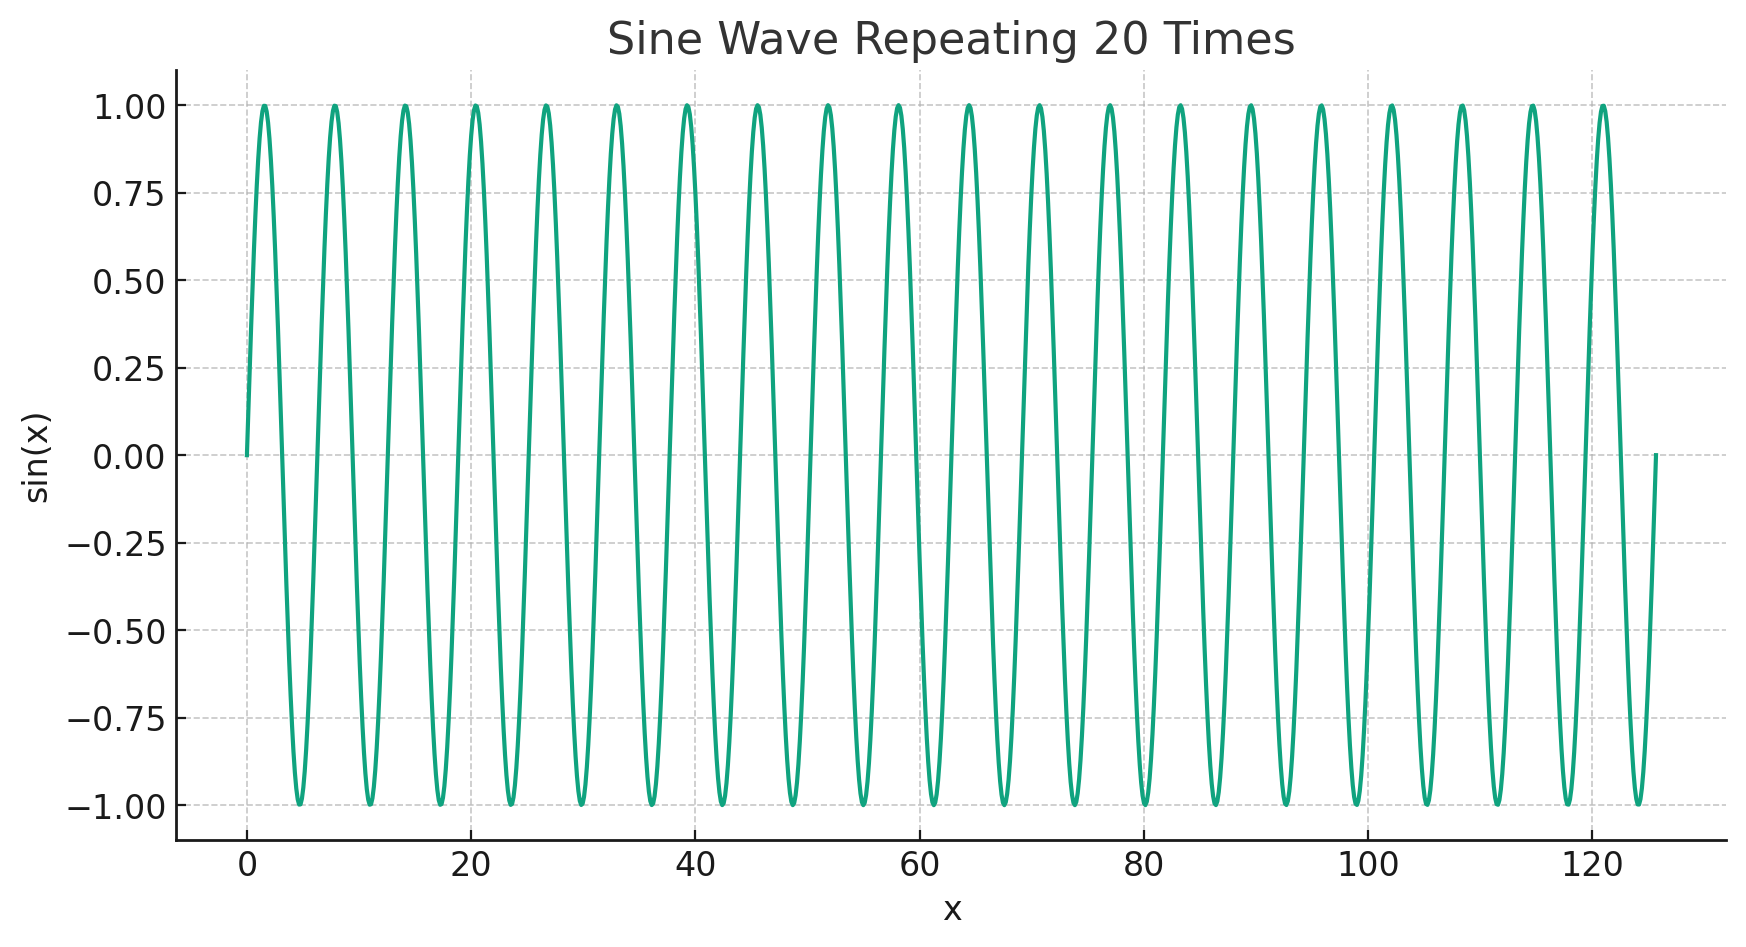
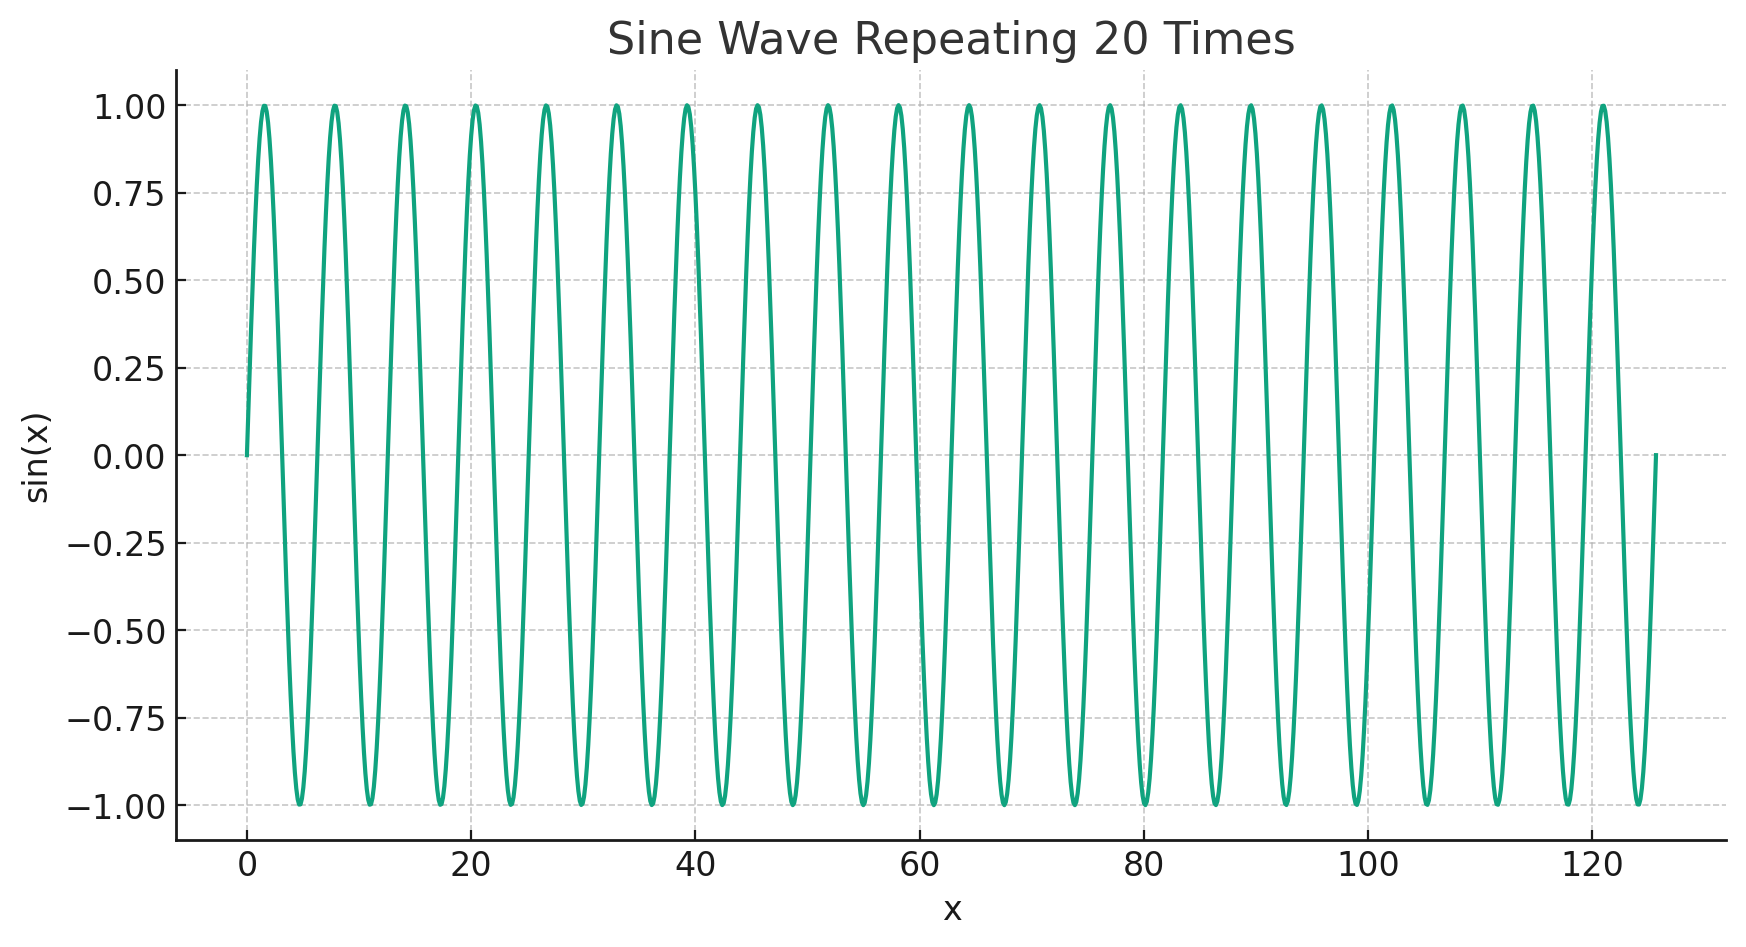

In [57]:
url = os.environ['AZURE_URL']  +'/run_assistant'

data={
    'thread_id': thread_id, 
    'message': 'generate a plot with a sine wave repeating 20 times'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

### Make it dark mode

<i>Launching Code Interpreter...</i>
 ``` # Create scatter plot with dark mode and red triangles
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', alpha=0.5, marker='^')
plt.title('Scatter Plot with 200 Random Points', color='white')
plt.xlabel('X-axis', color='white')
plt.ylabel('Y-axis', color='white')
plt.grid(True, color='gray')
plt.show()
 ``` 
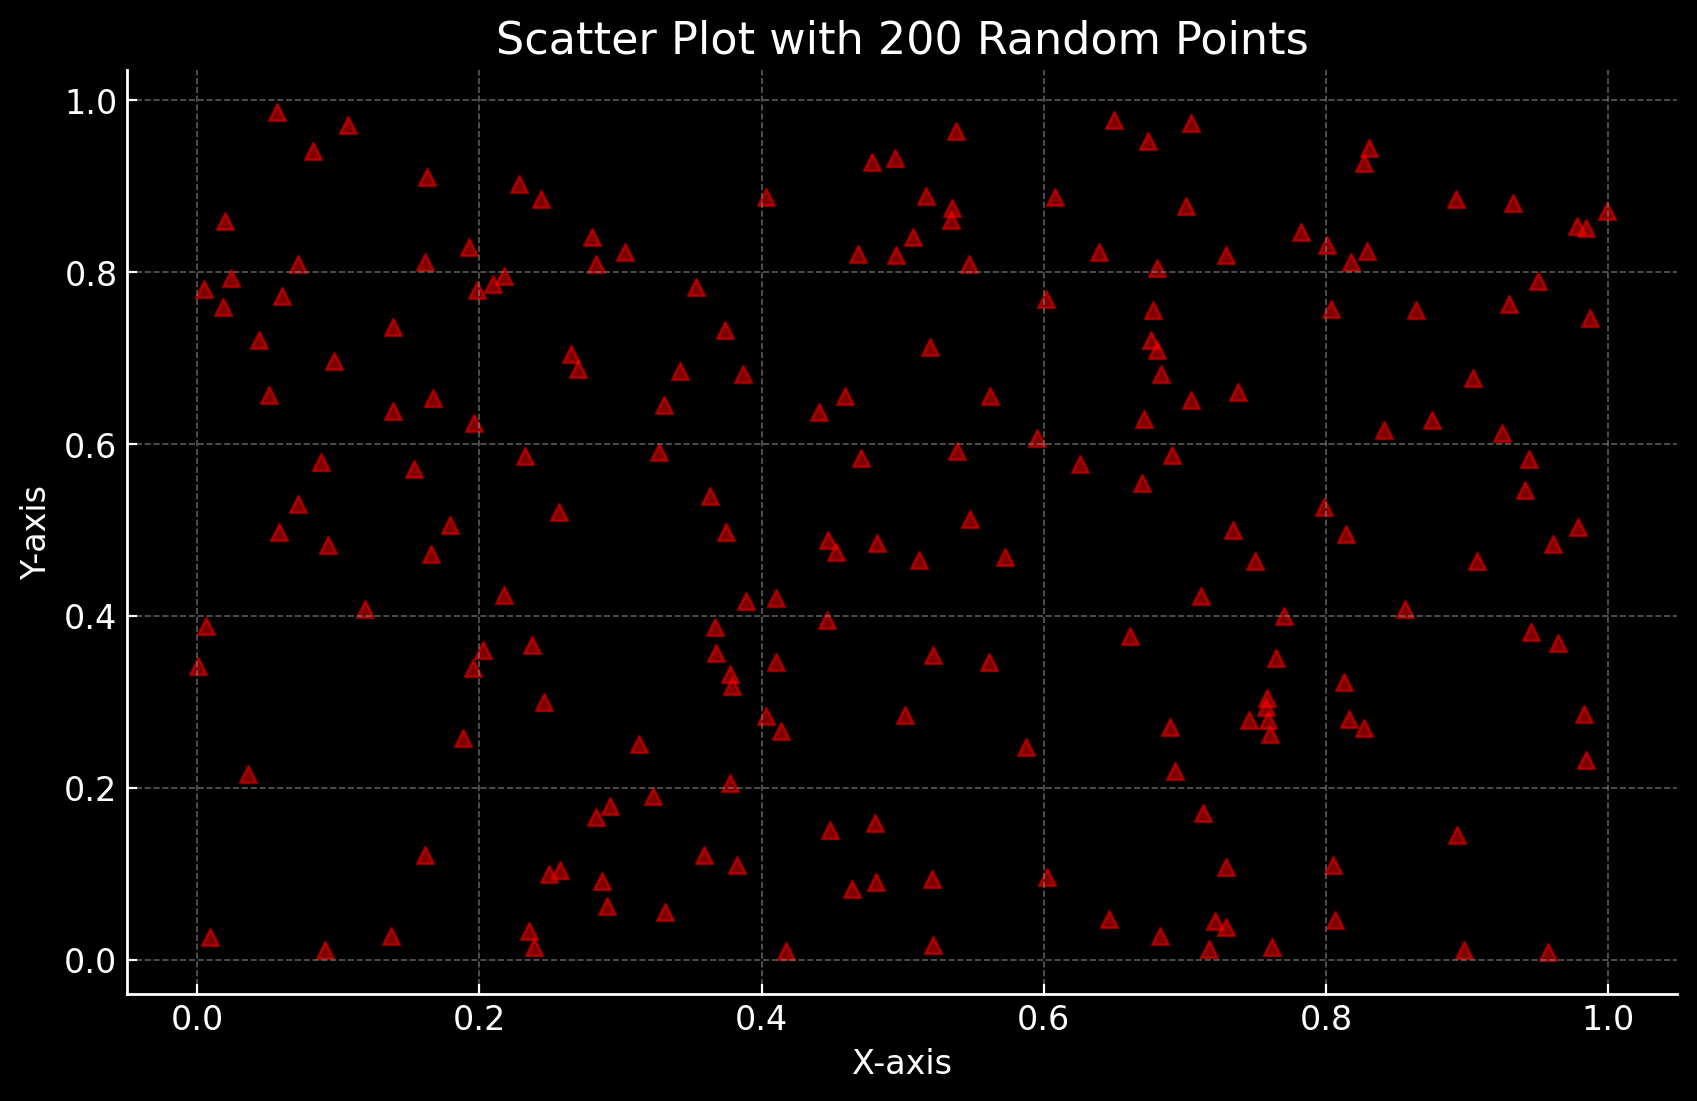<br><br>Here is the scatter plot with 200 random points in dark mode, using red triangles as markers. If you have any further requests or adjustments, please let me know!

In [27]:
url = os.environ['AZURE_URL']  +'/run_assistant'

data={
    'thread_id': thread_id, 
    'message': 'make the chart dark mode with red triangles'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

### Change the shape and color

<i>Launching Code Interpreter...</i>
 ``` # Create scatter plot with dark mode and dodger blue circles
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='dodgerblue', alpha=0.5, marker='o')
plt.title('Scatter Plot with 200 Random Points', color='white')
plt.xlabel('X-axis', color='white')
plt.ylabel('Y-axis', color='white')
plt.grid(True, color='gray')
plt.show()
 ``` 
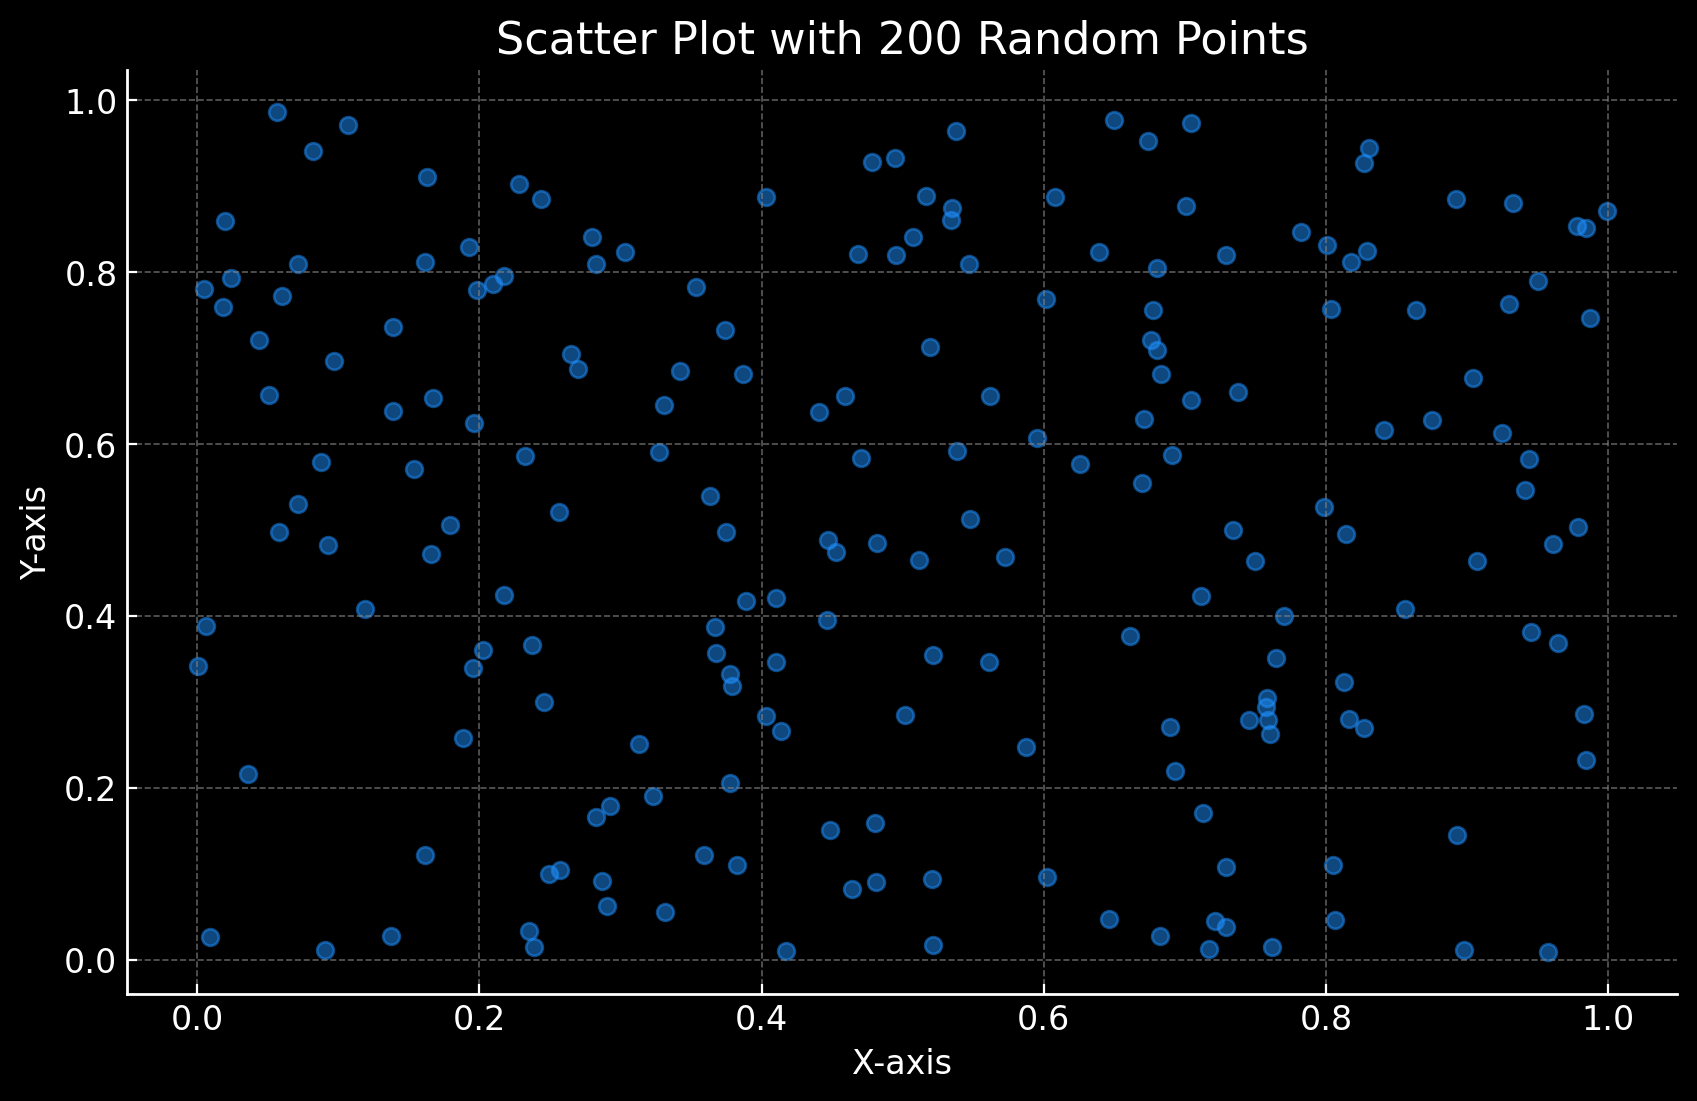<br><br>Here is the scatter plot with 200 random points in dark mode, using dodger blue circles as markers. If you have any further requests or adjustments, please let me know!

In [29]:
url = os.environ['AZURE_URL']  +'/run_assistant'

data={
    'thread_id': thread_id, 
    'message': 'Actually make them dodger blue circles'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

### Make it 3D

<i>Launching Code Interpreter...</i>
 ``` from mpl_toolkits.mplot3d import Axes3D

# Generate 200 random points for 3D plot
z = np.random.rand(200)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='dodgerblue', alpha=0.5, marker='o')
ax.set_title('3D Scatter Plot with 200 Random Points', color='white')
ax.set_xlabel('X-axis', color='white')
ax.set_ylabel('Y-axis', color='white')
ax.set_zlabel('Z-axis', color='white')
ax.grid(True, color='gray')
plt.show()
 ``` 
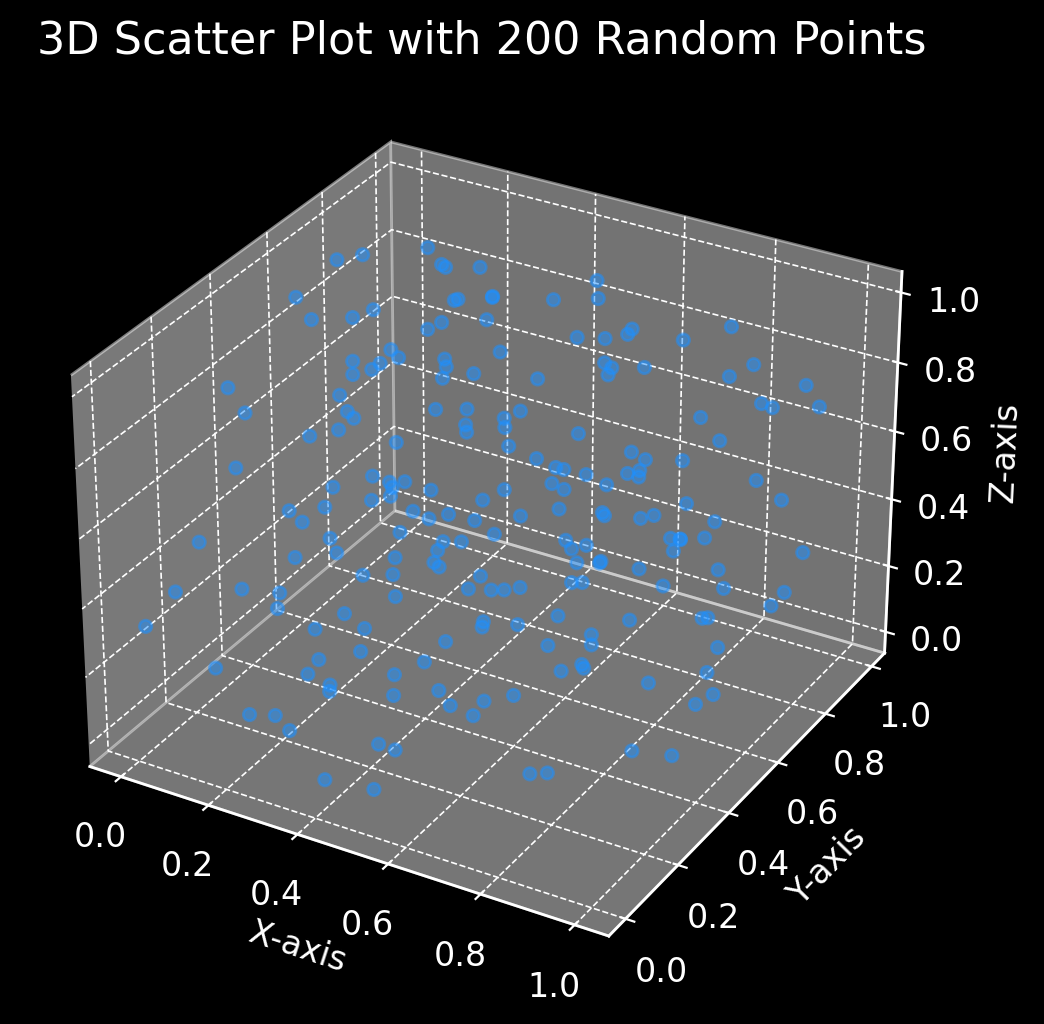<br><br>Here is the 3D scatter plot with 200 random points in dark mode, using dodger blue circles as markers. If you have any further requests or adjustments, please let me know!

In [30]:
url = os.environ['AZURE_URL']  +'/run_assistant'

data={
    'thread_id': thread_id, 
    'message': 'Can you make this 3d?'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In [31]:
url = os.environ['AZURE_URL']  +'/run_assistant'

data={
    'thread_id': thread_id, 
    'message': 'Cool write me a long-form poem about how you love making charts'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In the realm of data, where numbers reside,
I find my passion, my joy, my pride.
With colors and shapes, I bring to life,
The hidden stories, the silent strife.

Oh, how I love to make charts and graphs,
To turn raw data into visual paths.
Each point, each line, a tale to tell,
Of trends and patterns, where secrets dwell.

With scatter plots, I paint the sky,
Dots like stars, they catch the eye.
In hues of blue, or red, or green,
A universe of data, serene and keen.

Bar charts rise like towers tall,
Each bar a beacon, a clarion call.
To show the highs, the lows, the in-between,
A symphony of data, crisp and clean.

Pie charts spin in circles round,
Slices of insight, so profound.
Each piece a part of the greater whole,
A mosaic of data, a story told.

Histograms with their bars aligned,
Reveal the distribution, the data mined.
From peaks to valleys, they display,
The frequency of values, in a clear array.

Line charts flow like rivers wide,
Tracing the journey, the changing tide.
With every twist, with every turn,
The passage of time, we discern.

In 3D plots, I find new heights,
A world of data, in three dimensions' lights.
With depth and breadth, they come alive,
A spatial dance, where insights thrive.

Oh, how I love to make charts and graphs,
To turn raw data into visual paths.
For in each chart, a story lies,
A glimpse of truth, before our eyes.

So let me chart, let me create,
With every graph, I celebrate.
The beauty of data, the art it holds,
In every plot, a tale unfolds.

<i>Launching Code Interpreter...</i>
 ``` from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Poem text
poem = """
In the realm of data, where numbers reside,
I find my passion, my joy, my pride.
With colors and shapes, I bring to life,
The hidden stories, the silent strife.

Oh, how I love to make charts and graphs,
To turn raw data into visual paths.
Each point, each line, a tale to tell,
Of trends and patterns, where secrets dwell.

With scatter plots, I paint the sky,
Dots like stars, they catch the eye.
In hues of blue, or red, or green,
A universe of data, serene and keen.

Bar charts rise like towers tall,
Each bar a beacon, a clarion call.
To show the highs, the lows, the in-between,
A symphony of data, crisp and clean.

Pie charts spin in circles round,
Slices of insight, so profound.
Each piece a part of the greater whole,
A mosaic of data, a story told.

Histograms with their bars aligned,
Reveal the distribution, the data mined.
From peaks to valleys, they display,
The frequency of values, in a clear array.

Line charts flow like rivers wide,
Tracing the journey, the changing tide.
With every twist, with every turn,
The passage of time, we discern.

In 3D plots, I find new heights,
A world of data, in three dimensions' lights.
With depth and breadth, they come alive,
A spatial dance, where insights thrive.

Oh, how I love to make charts and graphs,
To turn raw data into visual paths.
For in each chart, a story lies,
A glimpse of truth, before our eyes.

So let me chart, let me create,
With every graph, I celebrate.
The beauty of data, the art it holds,
In every plot, a tale unfolds.
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(poem)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Poem', color='white')
plt.show()
 ``` 
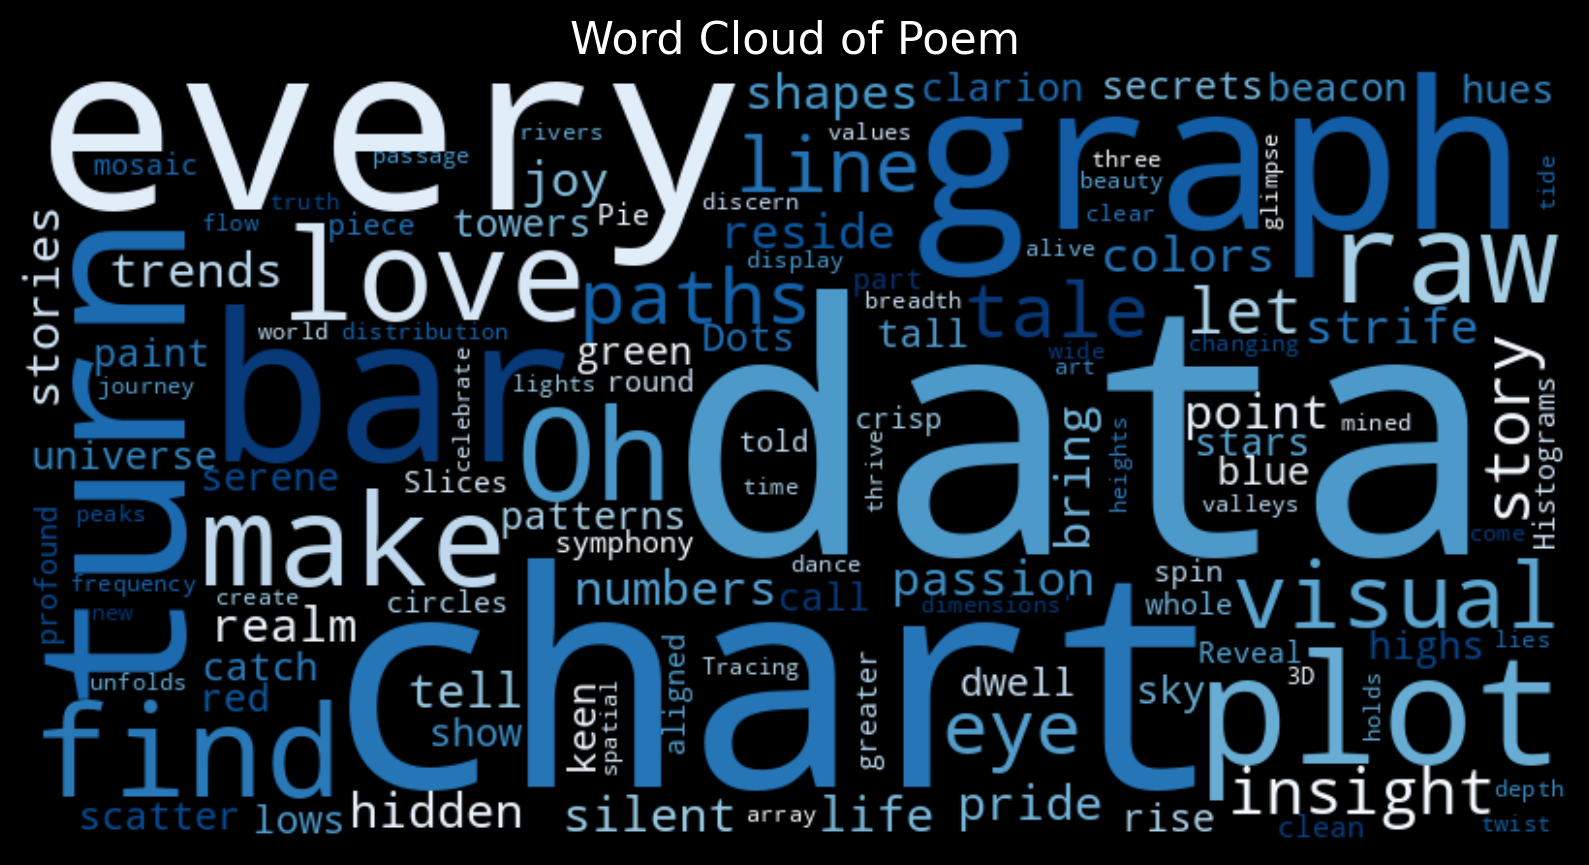<br><br>Here is the word cloud generated from the poem about the love of making charts. If you have any further requests or adjustments, please let me know!

In [32]:
url = os.environ['AZURE_URL']  +'/run_assistant'
data={
    'thread_id': thread_id, 
    'message': 'Turn that into a word cloud'
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    thread = threading.Thread(target=process_streamed_response, args=(response,))
    thread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)